**TP noté N2 - KNN (K nearest neighbourgs)**
--

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tp_knn_source import *

**GENERATION ARTIFICIELLE DE DONNEES**

In [2]:
# 1) Étudiez les fonctions rand_bi_gauss, rand_tri_gauss, rand_clown et rand_checkers.
# initialisation des variables

X1 , y1 =rand_bi_gauss(n1=20, n2=20, mu1=[1, 1], mu2=[-1, -1], sigmas1=[0.9, 0.9],sigmas2=[0.9, 0.9])
X2 , y2 =rand_tri_gauss(n1=50, n2=50, n3=50, mu1=[1, 1],
                   mu2=[-1, -1], mu3=[1, -1], sigma1=[0.9, 0.9],
                   sigma2=[0.9, 0.9], sigma3=[0.9, 0.9])
X3 , y3 = rand_clown(n1=50, n2=50, sigma1=1, sigma2=5)
X4 , y4 = rand_checkers(n1=150, n2=150, sigma=0.1)

In [3]:
print('X1',X1.shape,y1.shape)
print('X2',X2.shape,y2.shape)
print('X3',X3.shape,y3.shape)
print('X4',X4.shape,y4.shape)

X1 (40, 2) (40,)
X2 (150, 2) (150,)
X3 (100, 2) (100,)
X4 (288, 2) (288,)


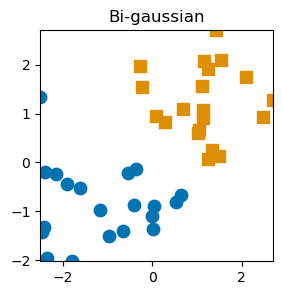

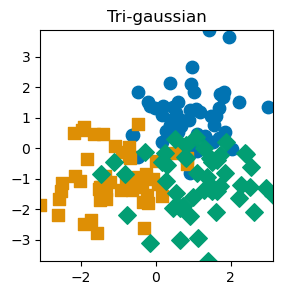

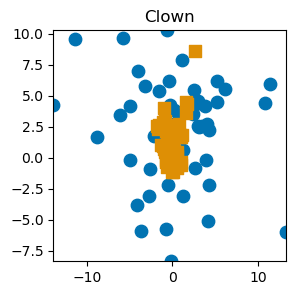

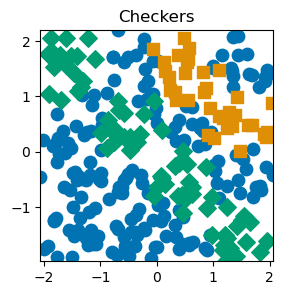

In [4]:
plot_2d(X1,y1,show_title='Bi-gaussian')
plot_2d(X2,y2,show_title='Tri-gaussian')
plot_2d(X3,y3,show_title='Clown')
plot_2d(X4,y4,show_title='Checkers')

**3) APPROCHE INTUITIVE**

# régression avec la moyenne (moyenne pondérée par distance ou médiane) des voisins

Si labels Y=R, les valeurs prises par le label sont continues, une régression revient à faire une estimation du labels à partir des labels des plus proches voisins. La classification suppose en effet des labels dans un Y discret (p classes). Ici Y =R est continu, il n'est donc pas question de classifier, mais de prédire le label dans Y=R.

Pour la régression, nous allons estimer la valeur (dans R) du label, à partir des valeurs (dans R) des labels des plus proches voisins.

Une fois les k plus proches voisins identifiés parmi les points d'apprentissage, nous pouvons prendre la moyenne des labels des plus proches voisins.

Nous pourrions également prendre la médiane des k des labels plus proches voisins (pour éviter l'impact d'outliers si les données sont très dispersées) ou encore la "moyenne pondérée par la distance" des labels des k plus proches voisins (pour tenir mieux compte des valeurs des points les plus prohces). 

**APPROCHE FORMELLE<br><br>Question 4 - Ecrivez votre propre class KNNClassifier** 

avec :<br>
- méthodes d'apprentissage : fit 
- méthode de classification : predict

In [5]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances_argmin, pairwise_distances, pairwise_distances_argmin_min

class KNNClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self,n_neighbors=1):
        self.k=n_neighbors
    
    def fit (self,X,y):
        self.labels=np.unique(y)
        self.X_train=X
        self.y_train=y
        #numpy.linalg.norm(a-b) euclidean distance
        
        
    def predict (self,X):
        self.X_test = X
        D = pairwise_distances_argmin(self.X_train,self.X_test)
        
        return D
        #pairwise_distances_argmin_min renvoie les distance euclidienne d'un point à une serie de points

In [6]:
my_knn = KNNClassifier(n_neighbors=5)
X=X2
y=y2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_test)
my_knn.fit(X_train,y_train)
print('OK')
my_knn.predict(X_test)

(120, 2) (30, 2) (120,) (30,)
[[-0.48662144 -0.27670105]
 [ 1.82117892  1.85650555]
 [-1.99014341  0.59412921]
 [ 2.04688638 -0.03696577]
 [-0.71272868 -0.2543117 ]
 [ 0.23493806 -0.15822339]
 [ 0.73346103  0.90455018]
 [-0.20304775 -1.78821766]
 [-1.84189721 -0.33833858]
 [-1.34177795 -1.66186568]
 [ 1.52721107  0.21356727]
 [ 1.09345529  0.48135028]
 [-0.67958155 -1.23205208]
 [ 1.80453006  1.67757981]
 [-0.14798908  1.3738045 ]
 [ 1.61498047 -2.0755528 ]
 [ 0.9221873  -2.22691201]
 [-2.03487162 -1.08057396]
 [-0.34817501 -0.98109365]
 [ 0.83969178 -0.51948535]
 [ 1.46690197  1.04874216]
 [ 1.29836682 -1.36940877]
 [ 0.57803013  1.52272449]
 [ 2.27719423 -1.20243508]
 [ 1.11691297 -2.95853075]
 [-1.11840168 -0.4553116 ]
 [ 1.72786621  1.76938228]
 [-0.47179481 -0.94901567]
 [ 0.05300507 -1.18738887]
 [ 1.86179553 -0.80472268]]
OK


AttributeError: 'NoneType' object has no attribute 'split'

In [7]:
A=np.array([[0,0],[0,1],[1,0]])
B=np.array([[1,1],[1,0],[0,1],[0,0]])
type(A)
print(A)
distance = pairwise_distances(A,B)
print(distance.shape,'\n',distance)
distance.argmin(axis=1)

[[0 0]
 [0 1]
 [1 0]]
(3, 4) 
 [[1.41421356 1.         1.         0.        ]
 [1.         1.41421356 0.         1.        ]
 [1.         0.         1.41421356 1.        ]]


array([3, 2, 1], dtype=int64)

In [9]:
pairwise_distances_argmin(A,B)

AttributeError: 'NoneType' object has no attribute 'split'